In [1]:
from helper_funcs import *

# Colourblind friendly colours
import tol_colors as tc
cset = tc.tol_cset('bright')
plt.rc('axes', prop_cycle=plt.cycler('color', list(cset)))

fsize = 24
plt.rcParams.update({'font.size': fsize})


dynamics_path = '../publication/dynamics/'
static_path = '../publication/static_tests/'

tmap = {
    'npt_000conEC_298K':'EMC (298$\,$K)',
    'npt_033conEC_298K':'EC:EMC (3:7) (298$\,$K)',
    'npt_066conEC_298K':'EC:EMC (7:3) (298$\,$K)',
    'npt_100conEC_313K':'EC (313$\,$K)',
}

conmap = {
    '000conEC':'EMC (298$\,$K)',
    '033conEC':'EC:EMC (3:7) (298$\,$K)',
    '066conEC':'EC:EMC (7:3) (298$\,$K)',
    '100conEC':'EC (313$\,$K)',
}

In [ ]:
tags = [
    'SDN22NQQ/wB97X/SEED1/DSET1',
    'SDN22NQQ/wB97X/SEED1/DSET2',
    'SDN22NQQ/wB97X/SEED1/DSET3',
    'SDN22NQQ/wB97X/SEED2/DSET1',
    'SDN22NQQ/wB97X/SEED3/DSET1',
    'SDN22NQ/wB97X/SEED1/DSET1',
    'SDN22NQ/wB97X/SEED1/DSET2',
    'SDN22NQ/wB97X/SEED1/DSET3',
    'SDN22NQ/wB97X/SEED2/DSET1',
    'SDN22NQ/wB97X/SEED3/DSET1',
    'SDN22N/wB97X/SEED1/DSET1',
    'SDN22N/wB97X/SEED2/DSET1',
    'SDN22N/wB97X/SEED3/DSET1',
] # These tags needs to be adjusted to be compliant with zenodo

# Data set statistics

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from aseMolec import anaAtoms as aa
from ase.io import read

SD22NQQ = read(f'{static_path}/SDN22NQQ/wB97X/SEED1/DSET1/train_data/SD22NQQ1_wB97XD3BJ_Psi4.xyz', ':')
SD22NQ = read(f'{static_path}/SDN22NQ/wB97X/SEED1/DSET1/train_data/SD22NQ1_wB97XD3BJ_Psi4.xyz', ':')
SD22N = read(f'{static_path}/SDN22N/wB97X/SEED1/DSET1/train_data/SD22N_wB97XD3BJ_Psi4.xyz', ':')

stats_SD2N   = np.histogram(np.array([at.info['Nmols'] for at in SD22N]), [1,2,3,4,5,6,7])[0]
stats_SD2NQ  = np.histogram(np.array([at.info['Nmols'] for at in SD22NQ]), [1,2,3,4,5,6,7])[0]
stats_SD2NQQ = np.histogram(np.array([at.info['Nmols'] for at in SD22NQQ]), [1,2,3,4,5,6,7])[0]

In [6]:
try:
    stats_df = pd.read_pickle("./cluster_stats.pkl")
except:
    stats_dict = {'SD22N':stats_SD2N, 'SD22NQ':stats_SD2NQ, 'SD22NQQ':stats_SD2NQQ}
    stats_df = pd.DataFrame(stats_dict)#.index.name('Cluster size')
    stats_df.index.name = 'Cluster size, $N_\\text{mols}$'
    stats_df.index += 1
    pd.to_pickle(stats_df, "./cluster_stats.pkl")
stats_df

,SD22N,SD22NQ,SD22NQQ
"Cluster size, $N_\text{mols}$",,,
1,77880,7880,900
2,82253,18253,1470
3,37176,10176,2001
4,17787,4787,1917
5,6464,1464,1464
6,264,264,264


In [7]:
tot = stats_df.aggregate('sum', axis=0)
stats_dist_df = stats_df/tot
clusters = np.arange(1, len(stats_dist_df)+1)
print(clusters)
expectation = (stats_dist_df*clusters[:,None]).aggregate('sum', axis=0).round(decimals=1)
print(expectation)
SD22N_cluster_size, SD22NQ_cluster_size, SD22NQQ_cluster_size = expectation

stats_dist_df

[1 2 3 4 5 6]
SD22N      2.1
SD22NQ     2.4
SD22NQQ    3.3
dtype: float64


,SD22N,SD22NQ,SD22NQQ
"Cluster size, $N_\text{mols}$",,,
1,0.351089,0.184009,0.112275
2,0.370803,0.426233,0.183383
3,0.167592,0.237624,0.249626
4,0.080185,0.111783,0.239147
5,0.029140,0.034186,0.182635
6,0.001190,0.006165,0.032934


In [8]:
SD22N_comp = collect_comp(SD22N)
SD22N_comp_flat = flatten_comp(SD22N_comp)
SD22N_comp_flat

,EMC,EC,EC and EMC and other,EC or EMC and other,Other
1,887,72354,0,0,4639
2,1069,40190,1092,9088,30814
3,178,23091,516,2433,10958
4,41,11528,189,706,5323
5,25,5322,139,344,634
6,0,0,144,110,10


In [9]:
SD22NQ_comp = collect_comp(SD22NQ)
SD22NQ_comp_flat = flatten_comp(SD22NQ_comp)
SD22NQ_comp_flat

,EMC,EC,EC and EMC and other,EC or EMC and other,Other
1,887,2354,0,0,4639
2,1069,190,1092,9088,6814
3,178,1091,516,2433,5958
4,41,1528,189,706,2323
5,25,322,139,344,634
6,0,0,144,110,10


In [10]:
SD22NQQ_comp = collect_comp(SD22NQQ)
SD22NQQ_comp_flat = flatten_comp(SD22NQQ_comp)
SD22NQQ_comp_flat

,EMC,EC,EC and EMC and other,EC or EMC and other,Other
1,150,150,0,0,600
2,70,70,70,560,700
3,40,40,220,1073,628
4,41,200,189,706,781
5,25,322,139,344,634
6,0,0,144,110,10


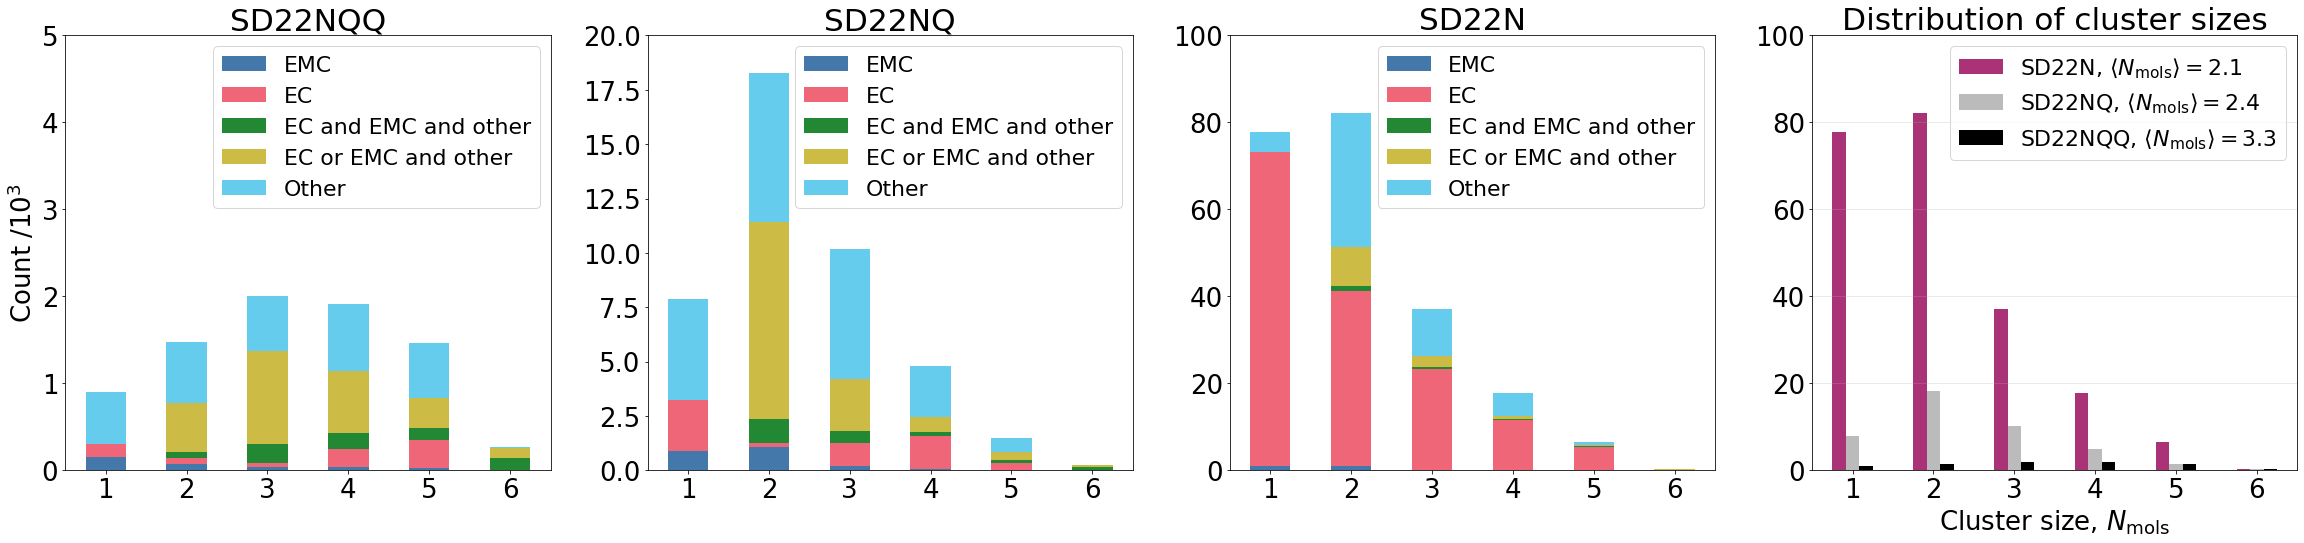

In [12]:
fsize = 26
plt.rcParams.update({'font.size': fsize})

fig, axs = plt.subplots(1,4, figsize=(10*4, 8*1), sharey=False)
comps = {
    'SD22NQQ':SD22NQQ_comp_flat,
    'SD22NQ':SD22NQ_comp_flat,
    'SD22N':SD22N_comp_flat,
}
for i, (ax, (name, data)) in enumerate(zip(axs, comps.items())):
    d = data/1e3
    if i == 0:
        ax.set_ylim([0,5])
    elif i == 1:
        ax.set_ylim([0,20])
    elif i == 2:
        ax.set_ylim([0,100])


    d.plot.bar(ax=ax, legend=False, stacked=True, rot=0)
    #ax.set_yscale('log')
    ax.legend(fontsize=fsize-4, ncols=1)
    ax.set_title(name)
axs[0].set_ylabel('Count /$10^3$')

axs[-1].set_title('Distribution of cluster sizes')
scaled_stats_df = stats_df/1e3
scaled_stats_df.plot.bar(
#stats_df.plot.bar(
    #ylabel='Count /$10^4$',
	rot=0,
	ax=axs[-1],
    color=cset[5:],
)
axs[-1].set_ylim([0,100])

axs[-1].grid(axis='y', alpha=0.3)
axs[-1].legend(
    [
        f'SD22N, $\\langle N_\\text{{mols}} \\rangle = {SD22N_cluster_size}$',
        f'SD22NQ, $\\langle N_\\text{{mols}} \\rangle = {SD22NQ_cluster_size}$',
        f'SD22NQQ, $\\langle N_\\text{{mols}} \\rangle = {SD22NQQ_cluster_size}$',
    ],
    fontsize=fsize-4,
)

# NPT dynamics

In [3]:
thermo = dict()
for tag in tags:
    thermo[tag] = get_all_thermo(f'{dynamics_path}{tag}/*') # Argument should be 'tag' to be consistent with zenodo

## Determining diffusion limit start times
### Taken from *Best Practices for Computing Transport Properties 1. Self-Diffusivity and Viscosity from Equilibrium Molecular Dynamics [Article v1.0]*
#### 5.2.3 Data analysis
In order to obtain reliable estimates of D, it is important to consider how the linear regression is performed for the MSD with respect to time (Equation 2). Specifically, the time interval that is included in the regression can have a significant impact on the predicted value of D. We recommend that only the “middle” of the MSD be used in the fit to approximate the long-time slope. Short time must be excluded as it follows a ballistic trajectory, while very long time is excluded due to the increased noise. **Currently, we are unaware of an objective approach for defining the “middle” region. Until such an approach exists, we recommend that the author reports how the region was selected and how much variability in D can be attributed to the choice of this region**. In addition, the uncertainty in the fit of the slope should be reported.

A typical log-log plot, borrowed from Ref. [36], is provided in Figure 2, where the linear regression to the “middle” region is included. From visual inspection, the “ballistic” short-time interval ranges from the beginning of the simulation to approximately 100 ps. **The “middle” region is identified by the linear regime with a slope of 1 (for a log-log plot)** spanning from approximately 100 ps to 1000 ps. Note that the noisy “long-time” simulation data (beyond 1000 ps) are not depicted in Figure 2 and are excluded from the linear fit.

In [ ]:
diff_coeffs = []
diff_errs = []
log_r2 = []
diff_r2 = []
diff_starts = []
for i, k in enumerate(thermo):
    tag = tags[i]
    data_set, functional, seed, dset_sample = tag.split('/')
    for j, (traj_name, traj_data) in enumerate(thermo[k].items()):

        # Collect data
        time, tunit = traj_data['Time']['data'], traj_data['Time']['units']
        msd, munit = traj_data['MSD']['data'], traj_data['MSD']['units']
        
        idx, r2 = get_start_index(time,msd,threshold=1e-3, min_steps=5e3)
        if idx != None:   
            D, err, R2 = diffusion_coefficient(time[idx:],msd[idx:])
            diff_coeffs.append(D)
            diff_errs.append(err)
            log_r2.append(r2)
            diff_r2.append(R2)
            print(idx, len(time), r2, D, err, R2)
            diff_starts.append(idx)
        else:
            diff_coeffs.append(np.nan)
            diff_errs.append(np.nan)
            log_r2.append(np.nan)
            diff_r2.append(np.nan)
            diff_starts.append(np.nan)

Using slope error thresold of: 0.001
64128 99997 5.6516889939825344e-12 0.9487089316481923
Using slope error thresold of: 0.001


/home/viktor/.local/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/viktor/.local/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/viktor/.local/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Using slope error thresold of: 0.001
73853 99999 4.354231175375296e-12 0.9471656303733829
Using slope error thresold of: 0.001
63370 99998 3.6090639545758616e-12 0.9345318275392056
Using slope error thresold of: 0.001
78693 81083 1.3142016238833553e-10 0.21253103614132907
Using slope error thresold of: 0.001
5488 81941 2.0391716087167027e-12 0.9778313789716246
Using slope error thresold of: 0.001
49179 82071 2.4030754995641846e-12 0.952662874440081
Using slope error thresold of: 0.001
33503 84271 1.8227140936819767e-12 0.983539364832072
Using slope error thresold of: 0.001
51736 99999 6.123209341260578e-12 0.9493976696865638
Using slope error thresold of: 0.001
98022 99999 1.5948552350879274e-10 0.186817027447591
Using slope error thresold of: 0.001
83070 99999 1.186982656216416e-11 0.8184558171215919
Using slope error thresold of: 0.001
34377 99999 1.8849433572154684e-12 0.9846449672028198
Using slope error thresold of: 0.001
43455 99999 6.095874424456574e-12 0.980744560913113
Using s

In [23]:
def rvalue_formatting(x):
    if x < 0.8:
        return 'background-color: red'
    elif x < 0.9:
        return 'background-color: orange'
    elif x < 0.95:
        return 'background-color: yellow'
    else:
        return None

In [24]:
try:
    df = pd.read_pickle("./part3a_opt_cluster.pkl")
except:
    df, dunit = get_density(tags, dynamics_path, std=True)
    df['Diffusion coefficient'] = [d*1e10 for d in diff_coeffs] # 1e-6 cm2/s
    #df['Corr. diffusion coefficient'] = [fsize_correction(D,r) for D,r in df[['Diffusion coefficient', 'Avg. density']]]
    df['Diff. fit error'] = [e*1e10 for e in diff_errs] # 1e-6 cm2/s
    df['log-log r2'] = log_r2
    df['Diff. r2'] = diff_r2
    df['Diff. start time /ns'] = [time[s]*1e-6 if type(s) == int else np.nan for s in diff_starts]
    pd.to_pickle(df, "./part3a_opt_cluster.pkl")
df.style.applymap(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])

/tmp/ipykernel_391501/2530497882.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df.style.applymap(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])


,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQQ,wB97X,1,1,"EMC (298$\,$K)",1.133707,0.015552,3.914330,0.056517,0.948528,0.948709,0.641290
1,SDN22NQQ,wB97X,1,1,"EC:EMC (3:7) (298$\,$K)",1.205010,0.015673,nan,nan,nan,nan,nan
2,SDN22NQQ,wB97X,1,1,"EC:EMC (7:3) (298$\,$K)",1.283700,0.016119,2.534736,0.043542,0.947227,0.947166,0.738540
3,SDN22NQQ,wB97X,1,1,"EC (313$\,$K)",1.379088,0.016214,2.219001,0.036091,0.933894,0.934532,0.633710
4,SDN22NQQ,wB97X,1,2,"EMC (298$\,$K)",1.131117,0.016579,2.835660,1.314202,0.208004,0.212531,0.786940
5,SDN22NQQ,wB97X,1,2,"EC:EMC (3:7) (298$\,$K)",1.201672,0.014779,3.184211,0.020392,0.981983,0.977831,0.054880
6,SDN22NQQ,wB97X,1,2,"EC:EMC (7:3) (298$\,$K)",1.292896,0.016199,1.662466,0.024031,0.946605,0.952663,0.491800
7,SDN22NQQ,wB97X,1,2,"EC (313$\,$K)",1.384449,0.016043,2.699404,0.018227,0.977894,0.983539,0.335030
8,SDN22NQQ,wB97X,1,3,"EMC (298$\,$K)",1.117259,0.016536,4.954569,0.061232,0.948326,0.949398,0.517370
9,SDN22NQQ,wB97X,1,3,"EC:EMC (3:7) (298$\,$K)",1.183245,0.016968,2.887044,1.594855,0.185052,0.186817,0.980240


### Lowered threshold from 0.001 to 0.01

In [14]:
diff_coeffs = []
diff_errs = []
log_r2 = []
diff_r2 = []
diff_starts = []
for i, k in enumerate(thermo):
    tag = tags[i]
    data_set, functional, seed, dset_sample = tag.split('/')
    for j, (traj_name, traj_data) in enumerate(thermo[k].items()):

        # Collect data
        time, tunit = traj_data['Time']['data'], traj_data['Time']['units']
        msd, munit = traj_data['MSD']['data'], traj_data['MSD']['units']
        
        idx, r2 = get_start_index(time,msd,threshold=1e-2, min_steps=5e3)
        if idx != None:   
            D, err, R2 = diffusion_coefficient(time[idx:],msd[idx:])
            diff_coeffs.append(D)
            diff_errs.append(err)
            log_r2.append(r2)
            diff_r2.append(R2)
            print(idx, len(time), r2, D, err, R2)
            diff_starts.append(idx)
        else:
            diff_coeffs.append(np.nan)
            diff_errs.append(np.nan)
            log_r2.append(np.nan)
            diff_r2.append(np.nan)
            diff_starts.append(np.nan)

Using slope error thresold of: 0.01
63704 99997 0.9478129337252742 3.8845153817442477e-10 5.607245591283305e-12 0.948158485037947
Using slope error thresold of: 0.01
99229 99999 0.12359565379322501 2.3472743675293176e-10 2.658196909654313e-10 0.12346156470022872
Using slope error thresold of: 0.01
71262 99999 0.9595532420283851 2.5126597847054763e-10 3.6317398231282695e-12 0.9584007817295394
Using slope error thresold of: 0.01
62876 99998 0.9340264928977463 2.2017937315363526e-10 3.554292899470888e-12 0.9346306526967475
Using slope error thresold of: 0.01
78688 81083 0.20566660207518722 2.811512930675305e-10 1.3107668352130797e-10 0.21020348547926052
Using slope error thresold of: 0.01
5000 81941 0.9824374203421545 3.1792564487418644e-10 2.019073848449091e-12 0.9780542503453097
Using slope error thresold of: 0.01
48852 82071 0.9453787393571396 1.6510539950799222e-10 2.3947901184882135e-12 0.951901192791054
Using slope error thresold of: 0.01
33099 84271 0.9758218615901924 2.68476129505

In [25]:
try:
    bdf = pd.read_pickle("./part3a_opt_cluster-b.pkl")
except:
    bdf, dunit = get_density(tags, dynamics_path, std=True)
    bdf['Diffusion coefficient'] = [d*1e9 for d in diff_coeffs] # 1e-5 cm2/s
    #bdf['Corr. diffusion coefficient'] = [fsize_correction(D,r) for D,r in df[['Diffusion coefficient', 'Avg. density']]] # 1e-5 cm2/s
    bdf['Diff. fit error'] = [e*1e9 for e in diff_errs]
    bdf['log-log r2'] = log_r2
    bdf['Diff. r2'] = diff_r2
    bdf['Diff. start time /ns'] = [time[s]*1e-6 if type(s) == int else np.nan for s in diff_starts]
    pd.to_pickle(bdf, "./part3a_opt_cluster-b.pkl")
bdf.style.map(rvalue_formatting, subset=['log-log r2', 'Diff. r2'])

,Train data,Functional,Seed,Sample,Composition,Avg. density,Std. density,Diffusion coefficient,Diff. fit error,log-log r2,Diff. r2,Diff. start time /ns
0,SDN22NQQ,wB97X,1,1,"EMC (298$\,$K)",1.133707,0.015552,0.388452,0.005607,0.947813,0.948158,0.637050
1,SDN22NQQ,wB97X,1,1,"EC:EMC (3:7) (298$\,$K)",1.205010,0.015673,0.234727,0.265820,0.123596,0.123462,0.992310
2,SDN22NQQ,wB97X,1,1,"EC:EMC (7:3) (298$\,$K)",1.283700,0.016119,0.251266,0.003632,0.959553,0.958401,0.712630
3,SDN22NQQ,wB97X,1,1,"EC (313$\,$K)",1.379088,0.016214,0.220179,0.003554,0.934026,0.934631,0.628770
4,SDN22NQQ,wB97X,1,2,"EMC (298$\,$K)",1.131117,0.016579,0.281151,0.131077,0.205667,0.210203,0.786890
5,SDN22NQQ,wB97X,1,2,"EC:EMC (3:7) (298$\,$K)",1.201672,0.014779,0.317926,0.002019,0.982437,0.978054,0.050000
6,SDN22NQQ,wB97X,1,2,"EC:EMC (7:3) (298$\,$K)",1.292896,0.016199,0.165105,0.002395,0.945379,0.951901,0.488530
7,SDN22NQQ,wB97X,1,2,"EC (313$\,$K)",1.384449,0.016043,0.268476,0.001861,0.975822,0.982537,0.330990
8,SDN22NQQ,wB97X,1,3,"EMC (298$\,$K)",1.117259,0.016536,0.491927,0.006042,0.948307,0.949378,0.511090
9,SDN22NQQ,wB97X,1,3,"EC:EMC (3:7) (298$\,$K)",1.183245,0.016968,0.286104,0.158878,0.183065,0.184852,0.980190


In [ ]:
tags = [
    'SDN22NQ/B97/SEED1/DSET1',
    'SDN22NQ/B97X/SEED1/DSET2',
    'SDN22NQ/B97/SEED1/DSET3',
    #'SDN22NQ/B97/SEED2/DSET1', # this is missing, locally (Sams) only 100%EMC?
    #'SDN22NQ/B97/SEED3/DSET1', # this is missing, locally (Sams) only 100%EMC?
] # These tags needs to be adjusted to be compliant with zenodo

## Results

NameError: name 'df' is not defined

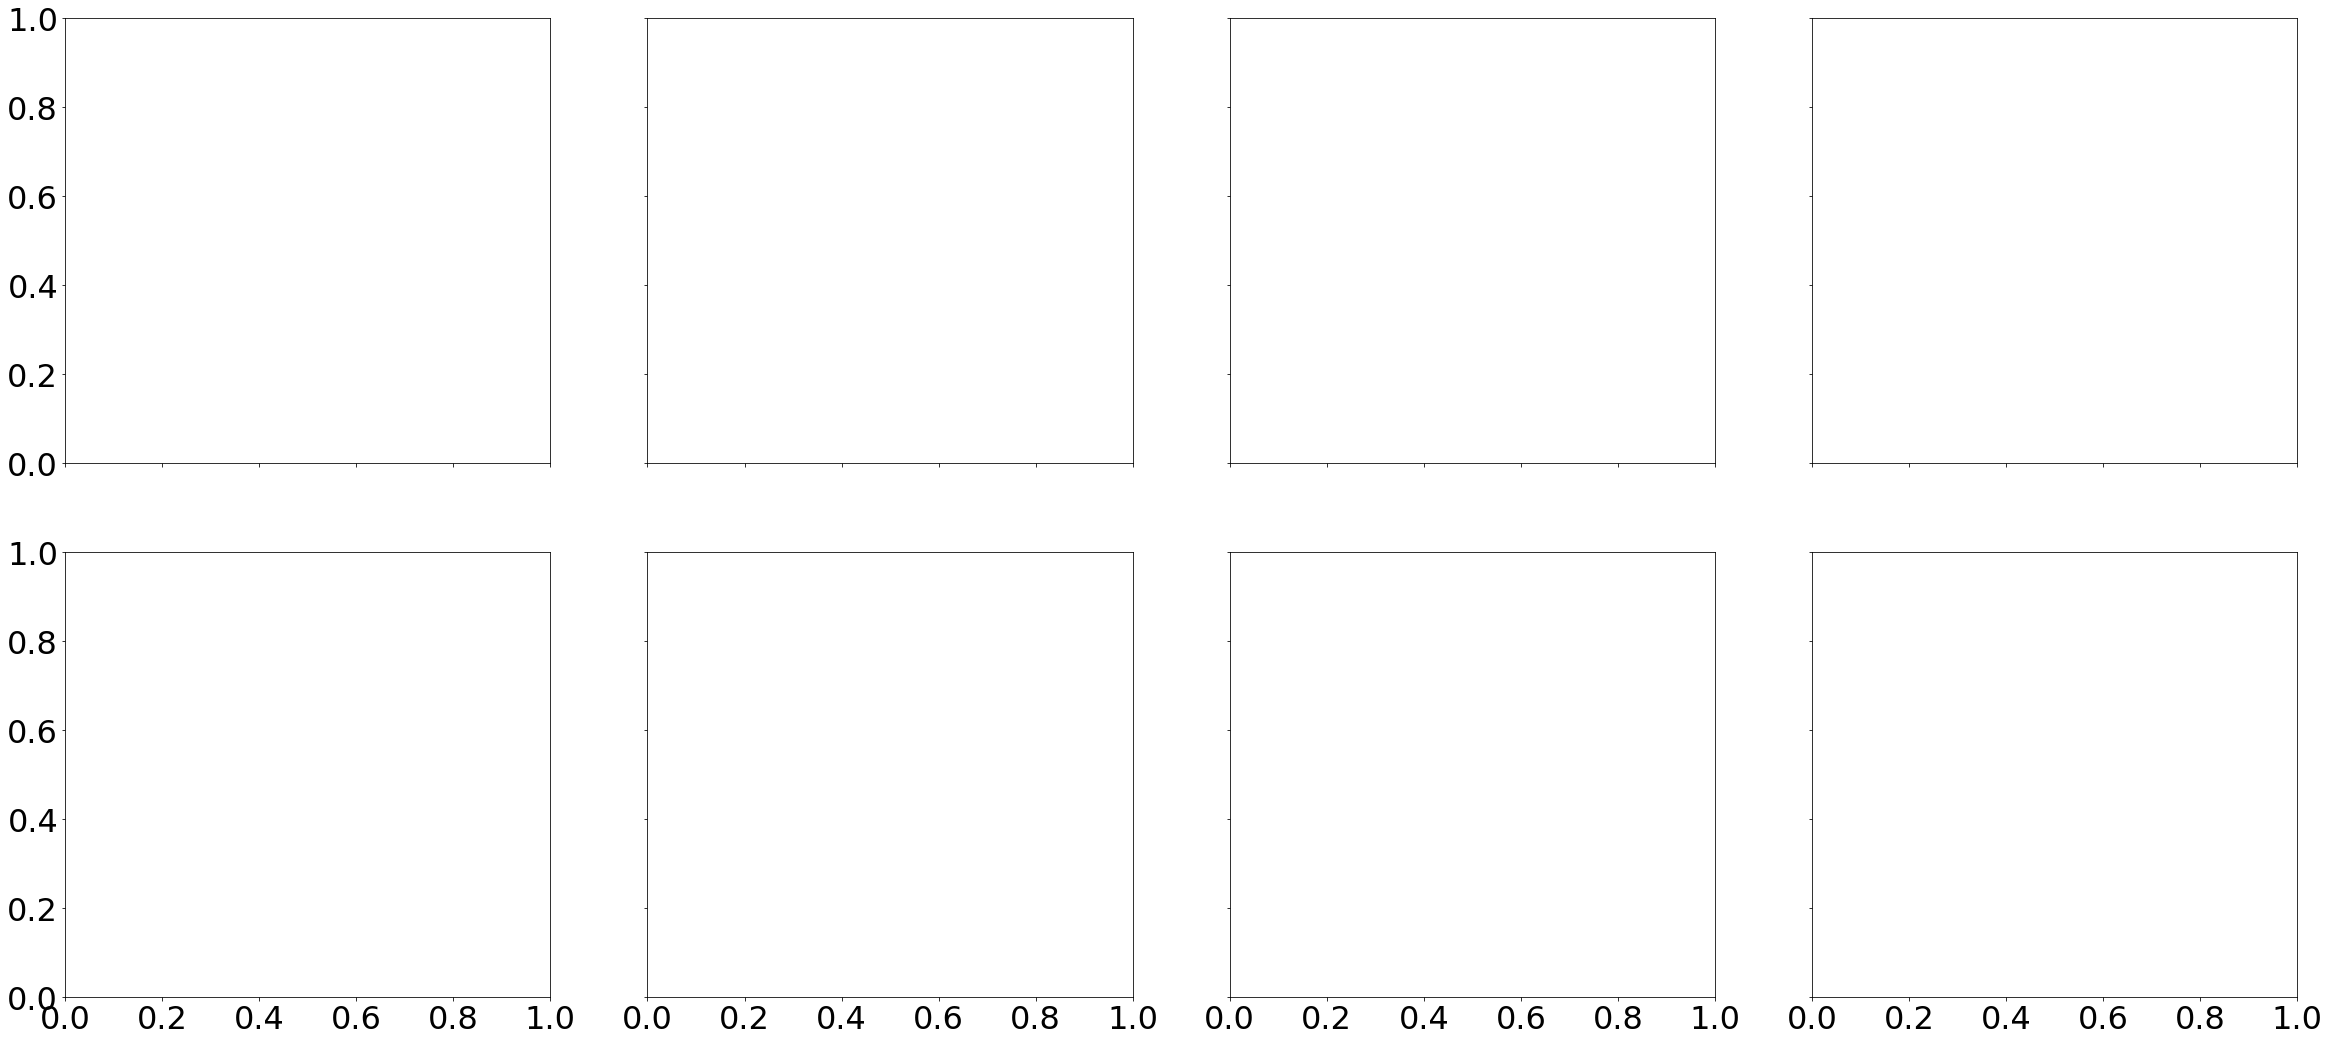

In [13]:
SD22N_cluster_size, SD22NQ_cluster_size, SD22NQQ_cluster_size = expectation


fsize = 32
plt.rcParams.update({'font.size': fsize})

fig, axs = plt.subplots(2,4, figsize=(10*4, 9*2), sharey='row', sharex='col')


seed_df = df[df['Sample'] == 1]
for ax, (n,g) in zip(axs[0,:], reversed(list(seed_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Avg. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Seed',
        values='Std. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    a0 = avg_g.plot.bar(
        title=n,
        ylim=[0.8,1.8],
        ylabel=f'Avg. density /{dunit}',
        rot=30,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Seed:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a0.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a0.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', padding=10, labels=dens_labels)


sample_df = df[df['Seed'] == 1]
for ax, (n,g) in zip(axs[1,:], reversed(list(sample_df.groupby('Composition')))):
    avg_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Avg. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    std_g = g.pivot(
        index='Train data',
        columns='Sample',
        values='Std. density',
    )#.sort_index(axis=0,ascending=False)#[order]
    a1 = avg_g.plot.bar(
        ylim=[0.4,1.4],
        ylabel=f'Avg. density /{dunit}',
        #color=cset[3:],
        rot=30,
        width=0.85,
        legend=False,
        ax=ax,
    )
    ax.grid(axis='y', alpha=0.3)
    ax.legend(title='Data set sample:', ncols=3, loc='upper center', fontsize=fsize-8)

    #for c in a1.containers:
    #    ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='edge', fmt='%.3f', padding=10)
    for i, c in enumerate(a1.containers):
        col_name = avg_g.columns[i]
        dens_vals = avg_g[col_name]
        dens_errs = std_g[col_name]
        dens_labels = [f'{v:.3f} $\\pm$ {e:.3f}' for v, e in zip(dens_vals, dens_errs)]
        ax.bar_label(c, rotation=90, fontsize=fsize-12, label_type='center', padding=10, labels=dens_labels, color='white')

plt.tight_layout()

